In [174]:
import numpy as np
import pandas as pd

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df = pd.read_csv('data.csv')

## Data preparation

In [221]:
columns_to_rename = {
    'V1': 'age',
    'V2': 'job',
    'V3': 'marital',
    'V4': 'education',
    'V5': 'default',
    'V6': 'balance',
    'V7': 'housing',
    'V8': 'loan',
    'V9': 'contact',
    'V10': 'day',
    'V11': 'month',
    'V12': 'duration',
    'V13': 'campaing',
    'V14': 'pdays',
    'V15': 'previous',
    'V16': 'poutcome',
    'Class': 'subscribe'
}

In [222]:
df = df.rename(columns=columns_to_rename)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaing,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [223]:
df.subscribe = df.subscribe - 1

In [224]:
df.subscribe.value_counts()

0    39922
1     5289
Name: subscribe, dtype: int64

In [290]:
df.subscribe.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: subscribe, dtype: float64

We see that we have an imbalance of target value in the dataset.

## Setting up the validation framework

In [225]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [226]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [227]:
df_train = df_train.reset_index(drop=True).copy()
df_val = df_val.reset_index(drop=True).copy()
df_test = df_test.reset_index(drop=True).copy()

In [228]:
y_train = df_train.subscribe.values
y_val = df_val.subscribe.values
y_test = df_test.subscribe.values

del df_train['subscribe']
del df_val['subscribe']
del df_test['subscribe']

## EDA

In [229]:
df_full_train.subscribe.nunique()

2

In [230]:
categorical = list(df_full_train.columns[df.dtypes == 'object'])
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [239]:
numerical = list(df_full_train.columns[df.dtypes != 'object'])
numerical

['age',
 'balance',
 'day',
 'duration',
 'campaing',
 'pdays',
 'previous',
 'subscribe']

## Check for missing values

Our dataset has no missing values. It's great!

In [232]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaing     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [233]:
df_full_train[categorical].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

## Feature importance

This is check for mutuale info of categorical values to define their importance

In [114]:
def mutual_info_subscibe_score(series):
    return mutual_info_score(series, df_full_train.subscribe)

In [115]:
mi = df_full_train[categorical].apply(mutual_info_subscibe_score)
mi.sort_values(ascending=False)

poutcome     0.028893
month        0.024718
contact      0.013041
job          0.008437
education    0.002564
marital      0.001980
dtype: float64

In [148]:
subscribe_housing_loan = df_full_train[df_full_train.housing == 1].subscribe.mean()
subscribe_housing_loan

0.07746548813188996

In [149]:
subscribe_personal_loan = df_full_train[df_full_train.loan == 1].subscribe.mean()
subscribe_personal_loan

0.06671299513551077

In [159]:
global_subscribe = df_full_train.subscribe.mean()
global_subscibe

0.11720305242203052

Checking for subscibe rate for people with housing loan and with personal loans.

In [160]:
global_subscribe - subscibe_housing_loan

0.03973756429014057

In [161]:
global_subscribe - subscibe_personal_loan

0.05049005728651976

As we see loans have small affection.

Checking for min max values for numerical values. (also hear we have some binary values)

In [158]:
for n in numerical: 
    print(n, df_full_train[n].min(), df_full_train[n].max())

age 18 95
default 0 1
balance -6847 102127
housing 0 1
loan 0 1
day 1 31
duration 0 4918
campaing 1 63
pdays -1 871
previous 0 275
subscribe 0 1


In [168]:
subscribe_negative_balance = df_full_train[df_full_train.balance < 0].subscribe.mean()
subscribe_negative_balance

0.05393634840871022

In [171]:
subscribe_positive_balance = df_full_train[df_full_train.subscribe >= 0].subscribe.mean()
subscribe_positive_balance

0.11720305242203052

As we see people with positive average yearly balance more likely to subscibe.

In [162]:
from IPython.display import display

In [164]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).subscribe.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_subscribe
    df_group['risk'] = df_group['mean'] / global_subscribe
    display(df_group)
    print()
    print()

job


,mean,count,diff,risk
job,,,,
admin.,0.122395,4175,0.005192,1.044301
blue-collar,0.073414,7805,-0.043789,0.626387
entrepreneur,0.082569,1199,-0.034634,0.704494
housemaid,0.090631,982,-0.026572,0.773285
management,0.138675,7550,0.021472,1.183207
retired,0.231323,1807,0.114120,1.973691
self-employed,0.112631,1243,-0.004572,0.960988
services,0.090122,3351,-0.027081,0.768942
student,0.291611,751,0.174408,2.488085




marital


,mean,count,diff,risk
marital,,,,
divorced,0.119242,4168,0.002039,1.017395
married,0.101889,21710,-0.015315,0.869333
single,0.148688,10290,0.031485,1.268636




education


,mean,count,diff,risk
education,,,,
primary,0.087201,5516,-0.030002,0.744015
secondary,0.105671,18567,-0.011532,0.901609
tertiary,0.150042,10617,0.032839,1.280192
unknown,0.138283,1468,0.021080,1.179862




contact


,mean,count,diff,risk
contact,,,,
cellular,0.148521,23458,0.031318,1.267209
telephone,0.135708,2358,0.018505,1.157890
unknown,0.042021,10352,-0.075182,0.358530




month


,mean,count,diff,risk
month,,,,
apr,0.193674,2308,0.076471,1.652467
aug,0.109776,4992,-0.007427,0.936628
dec,0.469880,166,0.352676,4.009106
feb,0.162048,2129,0.044845,1.382625
jan,0.095707,1118,-0.021496,0.816588
jul,0.090240,5574,-0.026963,0.769949
jun,0.106089,4270,-0.011114,0.905173
mar,0.528150,373,0.410947,4.506283
may,0.067389,10981,-0.049814,0.574978




poutcome


,mean,count,diff,risk
poutcome,,,,
failure,0.126894,3893,0.009691,1.082689
other,0.162618,1482,0.045415,1.387490
success,0.646617,1197,0.529413,5.517062
unknown,0.092242,29596,-0.024961,0.787029


## Correlation

In [179]:
df_full_train[numerical].corrwith(df_full_train.subscribe).abs().sort_values(ascending=False)

subscribe    1.000000
duration     0.398321
housing      0.138466
pdays        0.101045
previous     0.087392
campaing     0.072134
loan         0.068288
balance      0.055252
day          0.030624
default      0.025942
age          0.024931
dtype: float64

In [175]:
df_full_train[numerical].corr()

,age,default,balance,housing,loan,day,duration,campaing,pdays,previous,subscribe
age,1.000000,-0.016520,0.102596,-0.187465,-0.013923,-0.009180,-0.003643,0.006064,-0.025220,0.001319,0.024931
default,-0.016520,1.000000,-0.064948,-0.011470,0.076132,0.010840,-0.009994,0.022125,-0.029789,-0.017280,-0.025942
balance,0.102596,-0.064948,1.000000,-0.066956,-0.083514,0.001909,0.024720,-0.015093,0.002221,0.016354,0.055252
housing,-0.187465,-0.011470,-0.066956,1.000000,0.038663,-0.028040,0.005523,-0.023490,0.127134,0.039407,-0.138466
loan,-0.013923,0.076132,-0.083514,0.038663,1.000000,0.012666,-0.016454,0.012047,-0.025425,-0.012307,-0.068288
day,-0.009180,0.010840,0.001909,-0.028040,0.012666,1.000000,-0.030877,0.165652,-0.091869,-0.047050,-0.030624
duration,-0.003643,-0.009994,0.024720,0.005523,-0.016454,-0.030877,1.000000,-0.084098,-0.003927,0.001301,0.398321
campaing,0.006064,0.022125,-0.015093,-0.023490,0.012047,0.165652,-0.084098,1.000000,-0.088363,-0.031196,-0.072134
pdays,-0.025220,-0.029789,0.002221,0.127134,-0.025425,-0.091869,-0.003927,-0.088363,1.000000,0.437220,0.101045
previous,0.001319,-0.017280,0.016354,0.039407,-0.012307,-0.047050,0.001301,-0.031196,0.437220,1.000000,0.087392


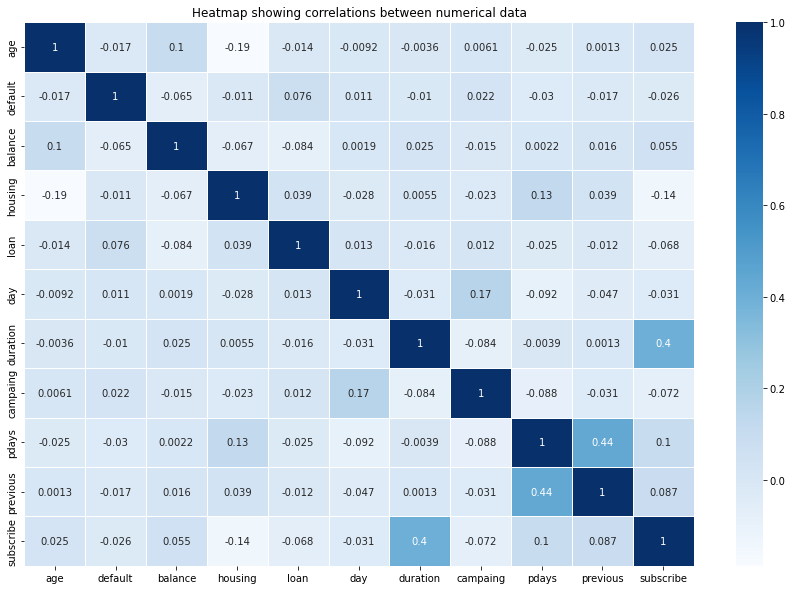

In [176]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_full_train[numerical].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

## Model training

I'll use logistic regression for solving this problem.

In [180]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [240]:
numerical = list(df_train.columns[df_train.dtypes != 'object'])
numerical

['age', 'balance', 'day', 'duration', 'campaing', 'pdays', 'previous']

In [252]:
def train(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [248]:
def predict(df, dv, model):
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [253]:
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    
    print('C=%s %.3f' % (C, auc))

C=0.001 0.860
C=0.01 0.896
C=0.1 0.898
C=0.5 0.901
C=1 0.900
C=5 0.900
C=10 0.897


I have choosen the best score which is 0.5.

In [257]:
dv, model = train(df_train, y_train, C=0.5)
y_pred = predict(df_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
auc

0.9013917091773562

Looks like I have a quiet good model. But it has all the features and need time to train and evaluate. 

I have choosen features with bigger correlation and features with bigger difference of subscribe score aginst general. I have done this to make the model smaller.

In [277]:
small_numerical = ['duration']
small_categorical = ['job', 'month', 'poutcome', 'housing']

In [280]:
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[small_numerical + small_categorical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    val_dict = df_val[small_numerical + small_categorical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    auc
    print('C=%s %.3f' % (C, auc))

C=0.001 0.879
C=0.01 0.898
C=0.1 0.902
C=0.5 0.903
C=1 0.902
C=5 0.903
C=10 0.903


I have tried to train model with smaller number of features and it shows almost the same scores. And works much faster than first one.

In [281]:
def train(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[small_numerical + small_categorical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [282]:
def predict(df, dv, model):
    val_dict = df_val[small_numerical + small_categorical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

### Cross-Validation

In [270]:
!pip install tqdm

  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [271]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [283]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.subscribe.values
    y_val = df_val.subscribe.values
    
    dv, model = train(df_train, y_train, C=0.5)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
scores

0it [00:00, ?it/s]

[0.8911908582684711,
 0.8948366847137287,
 0.9063274606802031,
 0.9041661570536401,
 0.9029619649532366]

So the model passed cross-validation test which means that it's stable and we can use it.

In [199]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [258]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

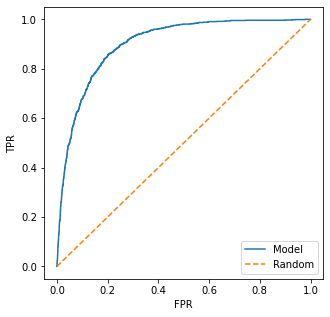

In [259]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

Also the plot shows auc score.

## Test request

In [293]:
import requests

In [294]:
url = 'http://localhost:9696/predict'

In [307]:
customer = {
    'age': 58,
    'job': 'management',
    'marital': 'married',
    'education': 'tertiary',
    'default': 'no',
    'balance': 2143,
    'housing': 'no',
    'loan': 'no',
    'contact': 'unknown',
    'day': 5,
    'month': 'may',
    'duration': 261,
    'campaing': 1,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown',
    'subscribe': 0
}

In [308]:
response = requests.post(url, json=customer).json()

In [309]:
response

{'subscibre': False, 'subscribe_probability': 0.07637675487020713}